/tmp/ipykernel_4022338/282711825.py:67: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)


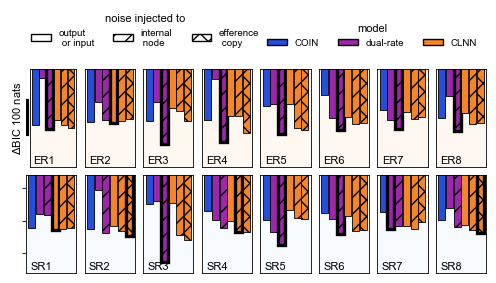

('subject_bar_grid.pdf', 'subject_bar_grid.svg')

In [13]:
# Retry with corrected parsing of family/suffix from keys (handles 'dual_rate_*').

import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1 import make_axes_locatable


rng = np.random.default_rng(7)

def load_or_mock(path):
    if os.path.exists(path):
        try:
            arr = np.loadtxt(path, dtype=float)
            return np.array(arr).reshape(-1)
        except Exception:
            pass
    return np.clip(rng.normal(0.65, 0.12, size=16), 0, 1)

# base_dir = "/mnt/data"
base_dir=''
filenames = {
    "coin_a":      os.path.join(base_dir, "/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/coin_bics1000.txt"),
    "dual_rate_a": os.path.join(base_dir, "dual_rate_a.txt"),
    "dual_rate_x": os.path.join(base_dir, "dual_rate_x.txt"),
    "clnn_a":      os.path.join(base_dir, "clnn_a.txt"),
    "clnn_x":      os.path.join(base_dir, "clnn_x.txt"),
    "clnn_u":      os.path.join(base_dir, "clnn_u.txt"),
}
data = {k: load_or_mock(p) for k,p in filenames.items()}
for k,p in filenames.items():
    if not os.path.exists(p):
        np.savetxt(p, data[k], fmt="%.6f")

mpl.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Arial", "Helvetica", "DejaVu Sans"],
    "font.size": 8,
    "axes.labelsize": 8,
    "axes.titlesize": 8,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    "legend.fontsize": 7,
    "lines.linewidth": 1.0,
    "axes.linewidth": 0.6,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "xtick.major.width": 0.6,
    "ytick.major.width": 0.6,
    "legend.frameon": False,
    "pdf.fonttype": 42, "ps.fonttype": 42, "svg.fonttype": "none",
})

def mm_to_in(mm): return mm/25.4
# W = mm_to_in(183)
W = mm_to_in(120)
H = W * 0.45 #0.9
fig, axes = plt.subplots(2, 8, figsize=(W, H), constrained_layout=True)
# fig, axes = plt.subplots(4, 4, figsize=(W, H), constrained_layout=True)
# plt.subplots_adjust(wspace=0.02, hspace=0.02, left=1)
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
order = ["coin_a", "dual_rate_a", "dual_rate_x", "clnn_a", "clnn_x", "clnn_u"]
# families = {"coin": "///", "dual_rate": "xx", "clnn": "++"}
# families = {"coin": "", "dual_rate": "xx", "clnn": "++"}
# suffix_colors = {"a": "#254EDB", "x": "#E59F00", "u": "#F6C453"}
families = {"coin": "#254EDB", "dual_rate": "#9B28AA", "clnn": "#F58529"}
suffixes = {"a": "", "x": "//", "u": "xx"}
sfx_for_legend = {"a": "output\n or input", "x": "internal\n node", "u": "efference\n copy"}
fam_for_legend = {"coin": "COIN", "dual_rate": "dual-rate", "clnn": "CLNN"}
def subgroup(idx):
    return "ER" if idx < 8 else "SR"
bg_color = {"SR": "#F7FBFF", "ER": "#FFF8F0"}

xpos = np.arange(len(order))
bar_width = 0.9
edge_width = 0.6
highlight_width = 2.4

YRANGE = 300          # ← the common height you want
means = [np.mean([data[k][s] for k in order]) for s in range(16)]


for s in range(16):
    r, c = divmod(s, 8)
    ax = axes[r, c]
    ax.set_facecolor(bg_color[subgroup(s)])
    
    values = np.array([float(data[k][s]) for k in order])
    subject_mean = values.mean()
    # ymin = min(values.min(), subject_mean) - 0.05 * max(1e-6, abs(values).max())
    # ymax = max(values.max(), subject_mean) + 0.08 * max(1e-6, abs(values).max())
    
    best_val = values.min()
    for i, key in enumerate(order):
        parts = key.split("_")
        fam = "_".join(parts[:-1])
        sfx = parts[-1]
        # color = suffix_colors[sfx]
        # hatch = families[fam]
        color = families[fam]
        hatch = suffixes[sfx]
        lw = highlight_width if np.isclose(values[i], best_val) else edge_width
        ax.bar(i, values[i], width=bar_width, color=color, edgecolor="black",
               linewidth=lw, hatch=hatch)
    
    # ax.axhline(subject_mean, ls="--", lw=0.8, color="0.4", dashes=(2,2), zorder=0)
    subject_mean = means[s]
    ax.set_ylim(subject_mean - YRANGE/2, subject_mean + YRANGE/2)
    ax.text(0.3, 0.02, f"{subgroup(s)}{s%8+1}", ha="center", va="bottom", transform=ax.transAxes, fontsize=8)
    # ax.set_ylim(ymin, ymax)
    # ax.set_xticks(xpos)
    # if r==3 and c==0:
    #     ax.set_xticklabels(["COIN","dual-rate OL","dual-rate CL ($\eta_{x_s}$)","CLNN OL","CLNN CL ($\eta_x$)","CLNN CL ($\eta_u$)"], rotation=35, ha="right")
    # # if c == 0:
    #     ax.set_ylabel("                                        BIC [nats] (smaller = better)", labelpad=2)
    #     ax.set_yticklabels([])

    # else:
    #     ax.set_yticklabels([])
    #     ax.set_xticklabels([])
    # ax.set_title(f"S{s+1:02d} • {subgroup(s)}", pad=2)
    ax.set_xticks([]); 
    ax.set_yticklabels([])

    if not c==0:
        ax.set_yticks([])      # no ticks
    # for spine in ax.spines.values():           # no box around the axes
    #     spine.set_visible(False)
    # also remove per-axes titles/labels if you had any:
    ax.set_xlabel(""); ax.set_ylabel(""); ax.set_title("")

# Legends
color_handles = [Patch(facecolor=col, edgecolor="black", label=fam_for_legend[sfx]) for sfx, col in families.items()]
hatch_handles = [Patch(facecolor="white", edgecolor="black", hatch=h, label=sfx_for_legend[fam]) for fam,h in suffixes.items()]
fig.legend(handles=hatch_handles, ncol=len(hatch_handles), loc="lower left", bbox_to_anchor=(0.01, 1.04), frameon=False, title="noise injected to")
fig.legend(handles=color_handles, ncol=len(color_handles), loc="lower right", bbox_to_anchor=(0.99, 1.04), frameon=False, title="model")
# fig.suptitle("Model Comparison", y=1.06, fontsize=9)





'''bar '''
SCALE_HEIGHT = 100                 # how tall the strip should be

anchor_ax = axes[0, 0]            # top-right subplot (choose any anchor)
divider = make_axes_locatable(anchor_ax)
scale_ax = divider.append_axes("left", size="8.2%", pad=0.001)

# Match the y-limits so the strip’s height is 100/300 of any subplot:
scale_ax.set_ylim(anchor_ax.get_ylim())
scale_ax.set_xlim(0, 1)
scale_ax.set_xticks([]); scale_ax.set_yticks([])
for spine in scale_ax.spines.values():
    spine.set_visible(False)

# Draw the strip centered vertically
yc = 0.5 * sum(scale_ax.get_ylim())
scale_ax.add_patch(Rectangle((0.0, yc - SCALE_HEIGHT/2), 0.2, SCALE_HEIGHT,
                             facecolor="black", edgecolor="black", linewidth=3))
# Label it (optional)
# scale_ax.text(0.5, yc + SCALE_HEIGHT/2 + 0.02*YRANGE, "100", ha="center", va="bottom")
scale_ax.text(0.5, yc, "$\Delta$BIC 100 nats\n\n", ha="center", va="center",
              rotation=90, color="black") 

'''end of bar'''
pdf_path = os.path.join(base_dir, "subject_bar_grid.pdf")
svg_path = os.path.join(base_dir, "subject_bar_grid.svg")
fig.savefig(pdf_path, format="pdf", bbox_inches="tight", transparent=True)
fig.savefig(svg_path, format="svg", bbox_inches="tight", transparent=True)
plt.show()

pdf_path, svg_path


In [14]:
os.path.join(base_dir, "subject_bar_grid.svg")

'subject_bar_grid.svg'

In [15]:
pwd!

'/homes/ar2342'